In [1]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
response = requests.get('https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,EMPSZFI,EMPSZFI_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN&for=state:*&key=a1b4b7615d90d9627950d637efc7bc6b20fe4304')

In [3]:
raw_json = response.json()

In [4]:
df = pd.DataFrame(raw_json,columns=raw_json.pop(0))

In [5]:
df

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,EMPSZFI,EMPSZFI_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN,state
0,0400000US28,Mississippi,48-49,Transportation and warehousing,651,Firms with 100 to 249 employees,0,0,0,0,28
1,0400000US28,Mississippi,48-49,Transportation and warehousing,652,Firms with 250 to 499 employees,0,0,0,0,28
2,0400000US28,Mississippi,48-49,Transportation and warehousing,657,Firms with 500 employees or more,176,0,26004,1235464,28
3,0400000US28,Mississippi,44-45,Retail trade,001,All firms,7349,0,147752,3589527,28
4,0400000US28,Mississippi,44-45,Retail trade,611,Firms with no employees,478,0,0,14887,28
...,...,...,...,...,...,...,...,...,...,...,...
10158,0400000US27,Minnesota,55,Management of companies and enterprises,641,Firms with 20 to 49 employees,0,0,0,0,27
10159,0400000US27,Minnesota,55,Management of companies and enterprises,642,Firms with 50 to 99 employees,11,0,309,22346,27
10160,0400000US27,Minnesota,55,Management of companies and enterprises,651,Firms with 100 to 249 employees,0,0,0,0,27
10161,0400000US27,Minnesota,55,Management of companies and enterprises,652,Firms with 250 to 499 employees,125,0,2834,193572,27


In [6]:
df['FIRMPDEMP'] = df['FIRMPDEMP'].astype(int)

In [7]:
df['RCPPDEMP'] = df['RCPPDEMP'].astype(int)

In [8]:
df['EMP'] = df['EMP'].astype(int)

In [9]:
df['PAYANN'] = df['PAYANN'].astype(int)

In [10]:
df_trim = df[['NAME','NAICS2017_LABEL','EMPSZFI_LABEL','FIRMPDEMP','RCPPDEMP','EMP','PAYANN']]

In [11]:
df_trim.EMPSZFI_LABEL.value_counts()

All firms                           1070
Firms with 1 to 4 employees         1060
Firms with no employees             1050
Firms with 5 to 9 employees         1042
Firms with 10 to 19 employees       1034
Firms with 20 to 49 employees       1020
Firms with 500 employees or more    1018
Firms with 100 to 249 employees      974
Firms with 50 to 99 employees        966
Firms with 250 to 499 employees      929
Name: EMPSZFI_LABEL, dtype: int64

In [12]:
no_totals = df_trim[df_trim['NAICS2017_LABEL'] != 'Total for all sectors']

In [13]:
no_totals = no_totals[no_totals['EMPSZFI_LABEL'] != 'All firms']

In [14]:
no_totals

,NAME,NAICS2017_LABEL,EMPSZFI_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN
0,Mississippi,Transportation and warehousing,Firms with 100 to 249 employees,0,0,0,0
1,Mississippi,Transportation and warehousing,Firms with 250 to 499 employees,0,0,0,0
2,Mississippi,Transportation and warehousing,Firms with 500 employees or more,176,0,26004,1235464
4,Mississippi,Retail trade,Firms with no employees,478,0,0,14887
5,Mississippi,Retail trade,Firms with 1 to 4 employees,3877,0,8227,187098
...,...,...,...,...,...,...,...
10158,Minnesota,Management of companies and enterprises,Firms with 20 to 49 employees,0,0,0,0
10159,Minnesota,Management of companies and enterprises,Firms with 50 to 99 employees,11,0,309,22346
10160,Minnesota,Management of companies and enterprises,Firms with 100 to 249 employees,0,0,0,0
10161,Minnesota,Management of companies and enterprises,Firms with 250 to 499 employees,125,0,2834,193572


In [15]:
emp_pay = no_totals[['EMP','PAYANN']]

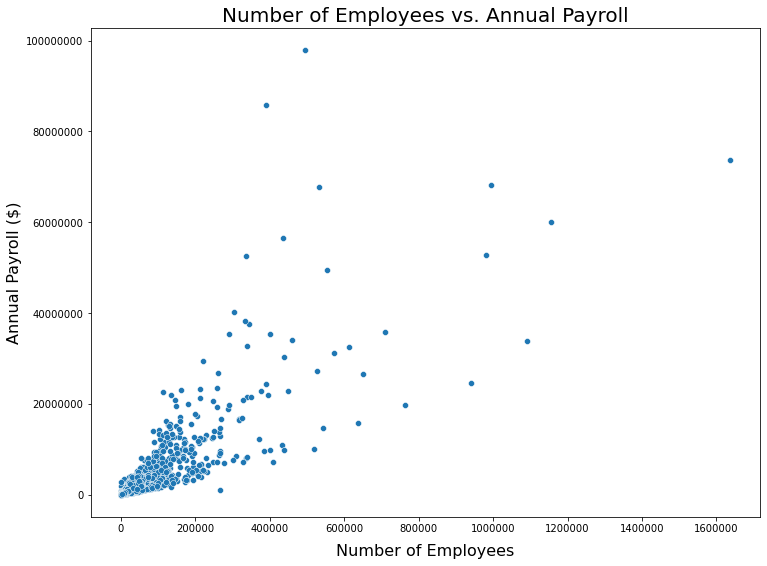

In [16]:
x_vals=emp_pay['EMP']
y_vals=emp_pay['PAYANN']

plt.figure(figsize=(12,9))
ax = sns.scatterplot(x=x_vals,y=y_vals)
ax.set_xlabel('Number of Employees', size=16)
ax.xaxis.labelpad = 10
ax.set_ylabel('Annual Payroll ($)', size=16)
ax.set_title("Number of Employees vs. Annual Payroll", size=20)
ax.ticklabel_format(style='plain')

plt.show()

In [17]:
cat_pay = no_totals[['NAICS2017_LABEL','PAYANN']]

In [18]:
avg_pay_by_cat = cat_pay.groupby('NAICS2017_LABEL').aggregate('mean').reset_index()
avg_pay_by_cat

,NAICS2017_LABEL,PAYANN
0,Accommodation and food services,5.509424e+05
1,Administrative and support and waste managemen...,9.510292e+05
2,"Agriculture, forestry, fishing and hunting",5.907938e+03
3,"Arts, entertainment, and recreation",1.368668e+05
4,Construction,6.800753e+05
5,Educational services,2.844676e+05
6,Finance and insurance,1.293534e+06
7,Health care and social assistance,1.904641e+06
8,Industries not classified,3.340476e+03
9,Information,7.912925e+05


[Text(0, 0, 'Accommodation and food services'),
 Text(0, 1, 'Administrative and support and waste management and remediation services'),
 Text(0, 2, 'Agriculture, forestry, fishing and hunting'),
 Text(0, 3, 'Arts, entertainment, and recreation'),
 Text(0, 4, 'Construction'),
 Text(0, 5, 'Educational services'),
 Text(0, 6, 'Finance and insurance'),
 Text(0, 7, 'Health care and social assistance'),
 Text(0, 8, 'Industries not classified'),
 Text(0, 9, 'Information'),
 Text(0, 10, 'Management of companies and enterprises'),
 Text(0, 11, 'Manufacturing'),
 Text(0, 12, 'Mining, quarrying, and oil and gas extraction'),
 Text(0, 13, 'Other services (except public administration)'),
 Text(0, 14, 'Professional, scientific, and technical services'),
 Text(0, 15, 'Real estate and rental and leasing'),
 Text(0, 16, 'Retail trade'),
 Text(0, 17, 'Transportation and warehousing'),
 Text(0, 18, 'Utilities'),
 Text(0, 19, 'Wholesale trade')]

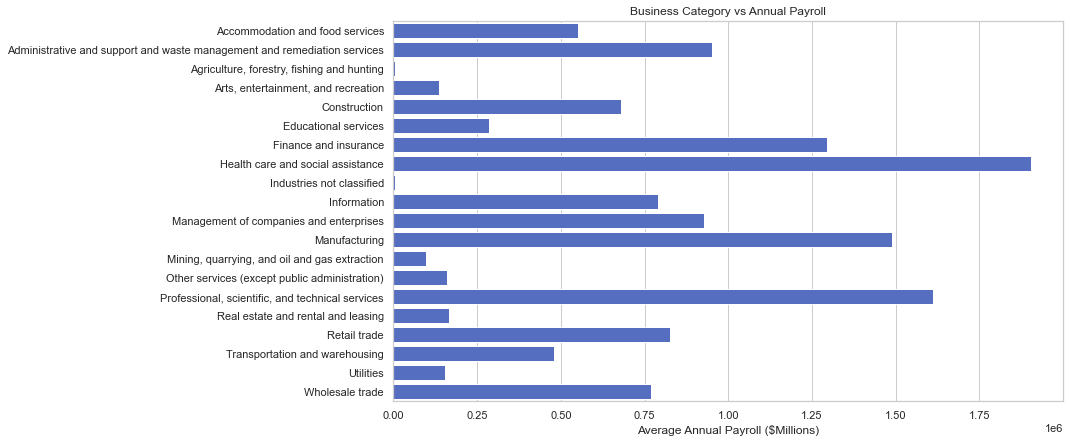

In [19]:
sns.set_theme(style='whitegrid')

#sorted_pay_by_cat = avg_pay_by_cat.sort_values(by=['PAYANN','NAICS2017_LABEL'],ascending=False)
#x_vals = sorted_pay_by_cat['PAYANN']
#y_vals = sorted_pay_by_cat['NAICS2017_LABEL']

x_vals = avg_pay_by_cat['PAYANN']
y_vals = avg_pay_by_cat['NAICS2017_LABEL']

plt.figure(figsize=(12,7))

x = np.arange(len(avg_pay_by_cat['NAICS2017_LABEL']))

ax = sns.barplot(x=x_vals, y=y_vals, color='#4464d1')
ax.set_xlabel('Average Annual Payroll ($Millions)')
ax.set_ylabel('')
ax.set_title('Business Category vs Annual Payroll')
ax.set_yticks(x)
ax.set_yticklabels(avg_pay_by_cat['NAICS2017_LABEL'])

In [20]:
no_totals.EMPSZFI_LABEL.value_counts()

Firms with 1 to 4 employees         1009
Firms with no employees              999
Firms with 5 to 9 employees          991
Firms with 10 to 19 employees        983
Firms with 20 to 49 employees        969
Firms with 500 employees or more     967
Firms with 100 to 249 employees      923
Firms with 50 to 99 employees        915
Firms with 250 to 499 employees      878
Name: EMPSZFI_LABEL, dtype: int64

In [21]:
hc_fsize_pay = no_totals[no_totals['NAICS2017_LABEL'] == 'Health care and social assistance']

In [22]:
hc_fsize_pay = hc_fsize_pay[['EMPSZFI_LABEL', 'PAYANN']]
hc_fsize_pay

,EMPSZFI_LABEL,PAYANN
88,Firms with no employees,42063
89,Firms with 1 to 4 employees,229628
90,Firms with 5 to 9 employees,294276
91,Firms with 10 to 19 employees,0
92,Firms with 20 to 49 employees,0
...,...,...
10118,Firms with 20 to 49 employees,1455173
10119,Firms with 50 to 99 employees,0
10120,Firms with 100 to 249 employees,1901506
10121,Firms with 250 to 499 employees,0


In [23]:
avg_pay_by_fsize = hc_fsize_pay.groupby('EMPSZFI_LABEL').aggregate('mean').reset_index()
avg_pay_by_fsize

,EMPSZFI_LABEL,PAYANN
0,Firms with 1 to 4 employees,5.327090e+05
1,Firms with 10 to 19 employees,9.654384e+05
2,Firms with 100 to 249 employees,1.203127e+06
3,Firms with 20 to 49 employees,1.161459e+06
4,Firms with 250 to 499 employees,6.886608e+05
5,Firms with 5 to 9 employees,7.737074e+05
6,Firms with 50 to 99 employees,5.248676e+05
7,Firms with 500 employees or more,1.119799e+07
8,Firms with no employees,9.380659e+04


In [24]:
avg_pay_by_fsize.index = [1,3,6,4,7,2,5,8,0]

In [25]:
avg_pay_by_fsize = avg_pay_by_fsize.sort_index()

In [26]:
avg_pay_by_fsize

,EMPSZFI_LABEL,PAYANN
0,Firms with no employees,9.380659e+04
1,Firms with 1 to 4 employees,5.327090e+05
2,Firms with 5 to 9 employees,7.737074e+05
3,Firms with 10 to 19 employees,9.654384e+05
4,Firms with 20 to 49 employees,1.161459e+06
5,Firms with 50 to 99 employees,5.248676e+05
6,Firms with 100 to 249 employees,1.203127e+06
7,Firms with 250 to 499 employees,6.886608e+05
8,Firms with 500 employees or more,1.119799e+07


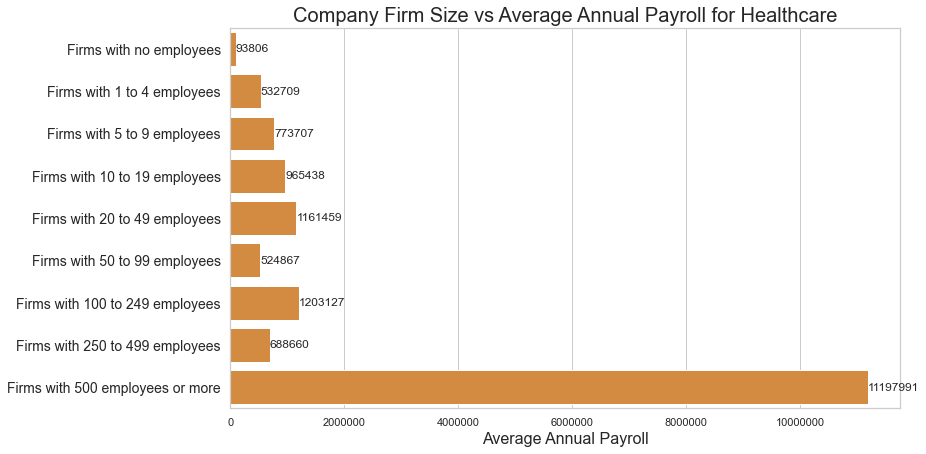

In [27]:
x_vals = avg_pay_by_fsize['PAYANN']
y_vals = avg_pay_by_fsize['EMPSZFI_LABEL']

plt.figure(figsize=(12,7))

x = np.arange(len(avg_pay_by_fsize['EMPSZFI_LABEL']))

ax = sns.barplot(x=x_vals, y=y_vals, color='#ea8c29')
ax.set_xlabel('Average Annual Payroll', size=16)
ax.set_ylabel('')
ax.set_title('Company Firm Size vs Average Annual Payroll for Healthcare', size=20)
ax.set_yticks(x)
ax.set_yticklabels(avg_pay_by_fsize['EMPSZFI_LABEL'], size=14)
ax.ticklabel_format(style='plain', axis='x')
ax.bar_label(ax.containers[0], label_type='edge', fmt='%d')

plt.show()